In [1]:
import pandas as pd
import yfinance as yf
import pandas_market_calendars as mcal
import yfinance as yf
from datetime import datetime
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import yfinance as yf
import pandas_market_calendars as mcal
import yfinance as yf
from datetime import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stock_project_functions as spf
warnings.filterwarnings("ignore")
np.random.seed(42)

In [3]:
df=pd.read_csv('Data_for_Model_2002_now.csv')
df.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,...,HYG_Close_pct_change_lag10,HYG_Close_pct_change_lag11,HYG_Close_pct_change_lag12,HYG_Close_pct_change_lag13,HYG_Close_pct_change_lag14,HYG_Close_pct_change_lag15,HYG_Close_pct_change_lag16,HYG_Close_pct_change_lag17,HYG_Close_pct_change_lag18,HYG_Close_pct_change_lag19
0,NaN,2010-09-09,26.998395,27.031872,26.680374,26.797541,5047900,0.0,0.0,0.0,...,-0.137558,-0.524355,0.0,0.23995,-0.205225,0.171314,0.378384,0.126261,0.438144,-0.344742
1,NaN,2010-09-09,18.806653,18.813499,18.683421,18.751883,4962900,0.0,0.0,0.0,...,-0.137558,-0.524355,0.0,0.23995,-0.205225,0.171314,0.378384,0.126261,0.438144,-0.344742
2,NaN,2010-09-09,34.126783,34.189391,33.657234,33.782448,7836700,0.0,0.0,0.0,...,-0.137558,-0.524355,0.0,0.23995,-0.205225,0.171314,0.378384,0.126261,0.438144,-0.344742
3,NaN,2010-09-09,9.137881,9.188124,9.056237,9.112760,100214233,0.0,0.0,0.0,...,-0.137558,-0.524355,0.0,0.23995,-0.205225,0.171314,0.378384,0.126261,0.438144,-0.344742
4,NaN,2010-09-09,23.152741,23.302519,23.129091,23.231571,6305700,0.0,0.0,0.0,...,-0.137558,-0.524355,0.0,0.23995,-0.205225,0.171314,0.378384,0.126261,0.438144,-0.344742


In [5]:
def plot_hue_column(df,column='Action',plot_one=False,plot_three=False):
    # Convert all dates to UTC, then remove timezone information
    df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_localize(None)
    
    # Sort the dataframe
    df = df.sort_values(by='Date')

    if plot_three:
        for ticker in ['XLB','XLK','XLY']:
            data = df[df['Ticker'] == ticker]
            fig, ax = plt.subplots(figsize=(8, 5))
            sns.scatterplot(x='Date', y='Close', data=data, hue=column, ax=ax)
            ax.set_title(f'Close Price for {ticker}\nTarget Label: {column}')
            ax.set_xlabel('Date')
            ax.set_ylabel('Close Price')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        return None
    
    # Now plot for each ticker
    for ticker in sector_stocks.keys():
        data = df[df['Ticker'] == ticker]
        if not data.empty:  # Check if there's data for this ticker
            fig, ax = plt.subplots(figsize=(8, 5))
            sns.scatterplot(x='Date', y='Close', data=data, hue=column, ax=ax)
            ax.set_title(f'Close Price for {ticker}\nTarget Label: {column}')
            ax.set_xlabel('Date')
            ax.set_ylabel('Close Price')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        if plot_one:
            break

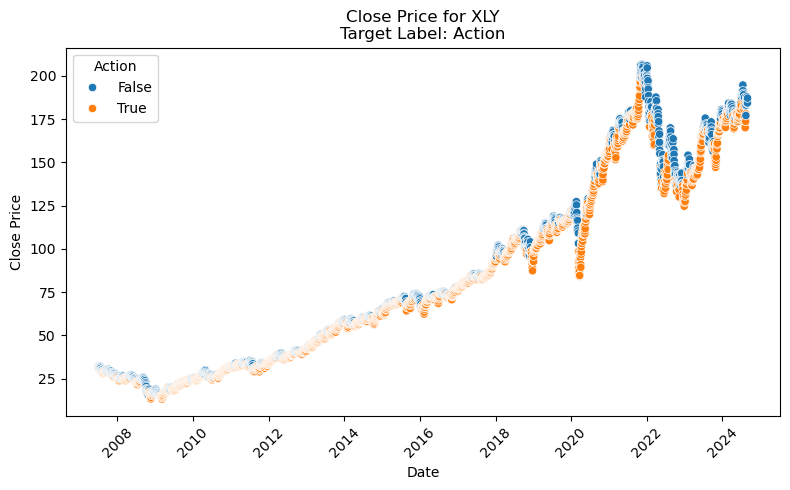

In [7]:
spf.plot_hue_column(df,column='Action',plot_one=True)

In [9]:
train,test,features=spf.get_train_test(df)
features

['Close_pct_change_lag1',
 'Close_pct_change_lag2',
 'Close_pct_change_lag3',
 'Close_pct_change_lag4',
 'Close_pct_change_lag5',
 'Close_pct_change_lag6',
 'Close_pct_change_lag7',
 'Close_pct_change_lag8',
 'Close_pct_change_lag9',
 'Close_pct_change_lag10',
 'Close_pct_change_lag11',
 'Close_pct_change_lag12',
 'Close_pct_change_lag13',
 'Close_pct_change_lag14',
 'Close_pct_change_lag15',
 'Close_pct_change_lag16',
 'Close_pct_change_lag17',
 'Close_pct_change_lag18',
 'Close_pct_change_lag19',
 'Close_pct_change_lag20',
 'TTM_Weekly_change_lag1',
 'TTM_Weekly_change_lag2',
 'TTM_Weekly_change_lag3',
 'TTM_Weekly_change_lag4',
 'TTM_Weekly_change_lag5',
 'TTM_change_lag1',
 'TTM_raw_lag1',
 'TTM_change_lag2',
 'TTM_raw_lag2',
 'TTM_change_lag3',
 'TTM_raw_lag3',
 'TTM_change_lag4',
 'TTM_raw_lag4',
 'TTM_change_lag5',
 'TTM_raw_lag5',
 'TTM_change_lag6',
 'TTM_raw_lag6',
 'TTM_change_lag7',
 'TTM_raw_lag7',
 'TTM_change_lag8',
 'TTM_raw_lag8',
 'TTM_change_lag9',
 'TTM_raw_lag9',
 

# Cross Val (Features)

Fold 2007 Results:
              precision    recall  f1-score   support

       False       0.37      0.31      0.34      3378
        True       0.65      0.71      0.68      6235

    accuracy                           0.57      9613
   macro avg       0.51      0.51      0.51      9613
weighted avg       0.55      0.57      0.56      9613


Fold 2008 Results:
              precision    recall  f1-score   support

       False       0.38      0.30      0.33      3597
        True       0.66      0.73      0.69      6584

    accuracy                           0.58     10181
   macro avg       0.52      0.52      0.51     10181
weighted avg       0.56      0.58      0.57     10181


Fold 2009 Results:
              precision    recall  f1-score   support

       False       0.33      0.25      0.29      3585
        True       0.65      0.73      0.69      6820

    accuracy                           0.57     10405
   macro avg       0.49      0.49      0.49     10405
weighted avg   

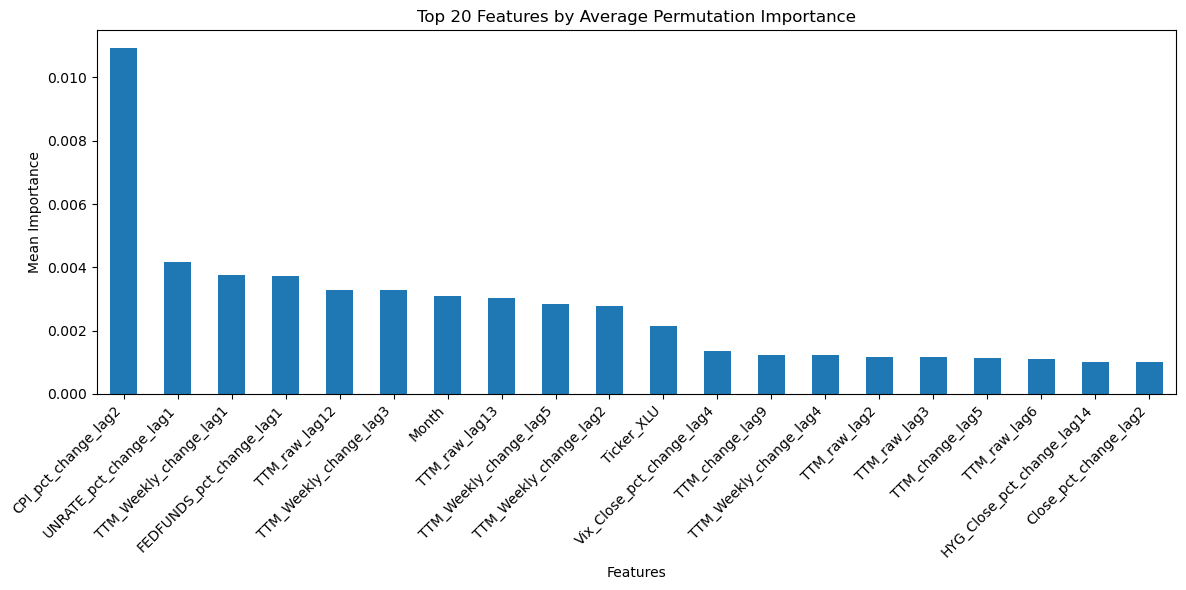

In [73]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
import xgboost as xgb
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
def calculate_permutation_importance(model, X, y):
    result = permutation_importance(
        model, X, y, n_repeats=10, random_state=42, n_jobs=1
    )
    return pd.DataFrame({
        'feature': X.columns,
        'importance': result.importances_mean
    })
accuracies = []
recalls = []
f1_scores = []
feature_importances = []
for start_year in sorted(df['Year'].unique())[:6]:
    end_year=start_year+12
    data=df[(df['Year']>=start_year)&(df['Year']<=end_year)]
    data=data.sort_values(by='Date')
    train,test,features=spf.get_train_test(data)
    X_train = train[features]
    y_train=train['Action']
    X_test = test[features]
    y_test=test['Action']
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
    # Print detailed classification report for each fold
    print(f"Fold {start_year} Results:\n{classification_report(y_test, y_pred)}\n")

    # Perform permutation feature importance
    fold_importance = calculate_permutation_importance(model, X_test, y_test)
    feature_importances.append(fold_importance)

# Print average performance metrics
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")

# Calculate average feature importance across all folds
avg_importance = pd.concat(feature_importances).groupby('feature').mean().sort_values('importance', ascending=False)
consistent_negative_features = avg_importance[avg_importance['importance'] < 0].index.tolist()
# Print average feature importance
print("\nAverage Permutation Feature Importance:")
print(avg_importance)

# Plot average feature importance
plt.figure(figsize=(12, 6))
avg_importance['importance'][:20].plot(kind='bar')
plt.title('Top 20 Features by Average Permutation Importance')
plt.xlabel('Features')
plt.ylabel('Mean Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [79]:
keep_features=[feature for feature in features if feature not in consistent_negative_features]
keep_features

['Close_pct_change_lag1',
 'Close_pct_change_lag2',
 'Close_pct_change_lag3',
 'Close_pct_change_lag4',
 'Close_pct_change_lag5',
 'Close_pct_change_lag6',
 'Close_pct_change_lag7',
 'Close_pct_change_lag9',
 'Close_pct_change_lag11',
 'Close_pct_change_lag12',
 'Close_pct_change_lag13',
 'Close_pct_change_lag14',
 'Close_pct_change_lag16',
 'Close_pct_change_lag17',
 'Close_pct_change_lag18',
 'Close_pct_change_lag19',
 'Close_pct_change_lag20',
 'TTM_Weekly_change_lag1',
 'TTM_Weekly_change_lag2',
 'TTM_Weekly_change_lag3',
 'TTM_Weekly_change_lag4',
 'TTM_Weekly_change_lag5',
 'TTM_change_lag1',
 'TTM_raw_lag1',
 'TTM_change_lag2',
 'TTM_raw_lag2',
 'TTM_change_lag3',
 'TTM_raw_lag3',
 'TTM_raw_lag4',
 'TTM_change_lag5',
 'TTM_raw_lag5',
 'TTM_change_lag6',
 'TTM_raw_lag6',
 'TTM_raw_lag7',
 'TTM_change_lag8',
 'TTM_raw_lag8',
 'TTM_change_lag9',
 'TTM_raw_lag9',
 'TTM_change_lag10',
 'TTM_raw_lag10',
 'TTM_change_lag11',
 'TTM_raw_lag11',
 'TTM_raw_lag12',
 'TTM_change_lag13',
 'TT

In [98]:
import itertools

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 5]
}

# Get all combinations
all_combinations = list(itertools.product(*param_grid.values()))

# Convert combinations to list of dictionaries
param_combinations = []
for combo in all_combinations:
    param_dict = dict(zip(param_grid.keys(), combo))
    param_combinations.append(param_dict)

# Print the number of combinations
print(f"Total number of combinations: {len(param_combinations)}")

# Print the first few combinations as an example
print("\nFirst 5 combinations:")
for combo in param_combinations[:5]:
    print(combo)


Total number of combinations: 26244

First 5 combinations:
{'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100, 'min_child_weight': 1, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 0}
{'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100, 'min_child_weight': 1, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
{'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100, 'min_child_weight': 1, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 5}
{'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100, 'min_child_weight': 1, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 0}
{'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100, 'min_child_weight': 1, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 1}


# Cross Val (HyperParameters)

In [121]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, f1_score
import csv
import numpy as np
import itertools

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 300, 500],
    'min_child_weight': [3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 5]
}

# Get all combinations
all_combinations = list(itertools.product(*param_grid.values()))

# Convert combinations to list of dictionaries
param_combinations = []
for combo in all_combinations:
    param_dict = dict(zip(param_grid.keys(), combo))
    param_combinations.append(param_dict)

# Print the number of combinations
print(f"Total number of combinations: {len(param_combinations)}")

# Print the first few combinations as an example
print("\nFirst 5 combinations:")
for combo in param_combinations[:5]:
    print(combo)

# Assuming param_combinations is already defined

import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, f1_score
import csv
import numpy as np
import os

# Assuming param_combinations is already defined

csv_filename = 'xgboost_gridSearch.csv'
file_exists = os.path.isfile(csv_filename)

with open(csv_filename, 'a', newline='') as csvfile:
    fieldnames = ['params', 'avg_accuracy', 'avg_recall', 'avg_f1_score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    if not file_exists:
        writer.writeheader()  # Write header only if file doesn't exist

    for combo in param_combinations:
        accuracies = []
        recalls = []
        f1_scores = []

        for start_year in sorted(df['Year'].unique())[:6]:
            end_year = start_year + 12
            data = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
            data = data.sort_values(by='Date')
            train, test, features = spf.get_train_test(data)
            X_train = train[features]
            y_train = train['Action']
            X_test = test[features]
            y_test = test['Action']

            model = xgb.XGBClassifier(
                n_estimators=combo['n_estimators'],
                max_depth=combo['max_depth'],
                learning_rate=combo['learning_rate'],
                min_child_weight=combo['min_child_weight'],
                subsample=combo['subsample'],
                colsample_bytree=combo['colsample_bytree'],
                gamma=combo['gamma'],
                reg_alpha=combo['reg_alpha'],
                reg_lambda=combo['reg_lambda'],
                use_label_encoder=False,
                eval_metric='logloss',
                random_state=42
            )

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            accuracies.append(accuracy_score(y_test, y_pred))
            recalls.append(recall_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        # Calculate average metrics across all folds
        avg_accuracy = np.mean(accuracies)
        avg_recall = np.mean(recalls)
        avg_f1_score = np.mean(f1_scores)
        print(avg_f1_score)
        # Write results to CSV
        writer.writerow({
            'params': str(combo),
            'avg_accuracy': avg_accuracy,
            'avg_recall': avg_recall,
            'avg_f1_score': avg_f1_score
        })

        # Optional: Print progress
        print(f"Completed evaluation for parameters: {combo}")

print("Evaluation complete. Results written to xgboost_results.csv")


Total number of combinations: 11664

First 5 combinations:
{'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100, 'min_child_weight': 3, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 0}
{'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100, 'min_child_weight': 3, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
{'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100, 'min_child_weight': 3, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 5}
{'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100, 'min_child_weight': 3, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 0}
{'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100, 'min_child_weight': 3, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 1}
0.7025259499291484
Completed evaluation for parameters: {'max_depth': 3, 'learning

KeyboardInterrupt: 

In [93]:
from sklearn.metrics import precision_score
data=df[df['Year']>=2012]
train,test,features=spf.get_train_test(data)
keep_features=[feature for feature in features if feature not in consistent_negative_features]
X_train = train[features]
y_train=train['Action']
X_test = test[features]
y_test=test['Action']
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test,y_pred))
print('F1_score', f1_score(y_test,y_pred))
print('Precision', precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
test['pred_prob']=y_pred_proba[:,1] #Probability of invest day
test['pred']=y_pred
thresholds=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
f1_scores=[]
for thresh in thresholds:
    test['Predicted_Action2']=test['pred_prob']>=thresh
    score=f1_score(test['Predicted_Action2'],test['Action'])
    f1_scores.append(score)              
    print(thresh)
    print(score)

Accuracy: 0.5758426966292135
Recall 0.7456972816470967
F1_score 0.6717866975800608
Precision 0.6112063282794991
              precision    recall  f1-score   support

       False       0.49      0.34      0.40      4463
        True       0.61      0.75      0.67      6217

    accuracy                           0.58     10680
   macro avg       0.55      0.54      0.54     10680
weighted avg       0.56      0.58      0.56     10680



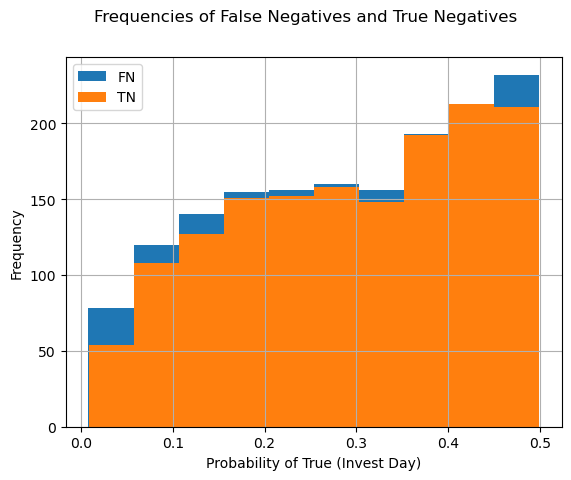

In [95]:

test['False_negative']=(test['Action'])&(~test['pred'])
fig,ax=plt.subplots()
test[test['False_negative']]['pred_prob'].hist(ax=ax,label='FN')
test['True_negative']=(~test['Action'])&(~test['pred'])
test[test['True_negative']]['pred_prob'].hist(label='TN',ax=ax)
ax.set_xlabel('Probability of True (Invest Day)')
ax.set_ylabel('Frequency')
fig.suptitle('Frequencies of False Negatives and True Negatives')
plt.legend()


In [118]:
grid_search=pd.read_csv(csv_filename)
grid_search[grid_search['avg_f1_score']==grid_search['avg_f1_score'].max()]['params'].values

array(["{'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.6, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 5}",
       "{'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.6, 'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 5}",
       "{'max_depth': 3, 'learning_rate': 0.01, 'n_estimators': 100, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.6, 'gamma': 0.3, 'reg_alpha': 0, 'reg_lambda': 5}"],
      dtype=object)